#### ASP3231 Project Week 5 - Abhiram Aroop
Combining Bias From C11 telescope

In [13]:
#Importing everything we need
import numpy as np
import astropy
import photutils
import ccdproc
from ccdproc import CCDData, combiner
from astropy import units as u
import astropy.io.fits as fits
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils import centroid_com, centroid_1dg, centroid_2dg
from photutils import CircularAperture
from photutils import aperture_photometry
from photutils import Background2D
from photutils import MedianBackground
from photutils import DAOStarFinder
from photutils import detect_sources, deblend_sources, source_properties
from scipy.ndimage import shift
import gc
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

C:\Users\abhir\AppData\Local\Temp/ipykernel_47864/3630739965.py:13: DeprecationWarning: `photutils.centroid_com` is a deprecated alias for `photutils.centroids.centroid_com`. Instead, please use `from photutils.centroids import centroid_com` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg
C:\Users\abhir\AppData\Local\Temp/ipykernel_47864/3630739965.py:13: DeprecationWarning: `photutils.centroid_1dg` is a deprecated alias for `photutils.centroids.centroid_1dg`. Instead, please use `from photutils.centroids import centroid_1dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg
C:\Users\abhir\AppData\Local\Temp/ipykernel_47864/3630739965.py:13: DeprecationWarning: `photutils.centroid_2dg` is a deprecated alias for `photutils.centroids.centroid_2dg`. Instead, please use `from photutils.centroids import centroid_2dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg


In [14]:
gc.enable()

In [15]:
#Get all the Bias Images 
images = ccdproc.ImageFileCollection(".")
filenames = ( images.files_filtered(PICTTYPE = 2) ) #PICTYPE = 2, Bias
print("List of all Bias image fits files:")
print(filenames) #verify to check if files are valid

List of all Bias image fits files:
['Bias_00003613.fits' 'Bias_00003614.fits' 'Bias_00003615.fits'
 'Bias_00003616.fits' 'Bias_00003617.fits' 'Bias_00003618.fits'
 'Bias_00003619.fits' 'Bias_00003620.fits' 'Bias_00003621.fits'
 'Bias_00003622.fits' 'Bias_00003623.fits' 'Bias_00003624.fits'
 'Bias_00003625.fits' 'Bias_00003626.fits' 'Bias_00003627.fits'
 'Bias_00003628.fits' 'Bias_00003629.fits' 'Bias_00003630.fits'
 'Bias_00003631.fits' 'Bias_00003632.fits' 'Bias_00003633.fits'
 'Bias_00003634.fits' 'Bias_00003635.fits' 'Bias_00003636.fits'
 'Bias_00003637.fits' 'Bias_00003638.fits' 'Bias_00003639.fits'
 'Bias_00003640.fits' 'Bias_00003641.fits' 'Bias_00003642.fits']


In [16]:
#Getting list of list of counts for each bias image.
biases = [ CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 2)]
#printing the amount of biases
print(len(biases), ' bias images loaded')
print(biases)

Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'.


30  bias images loaded
[CCDData([[2135, 2118, 2189, ..., 2118, 2252, 2113],
         [2225, 2137, 2115, ..., 2171, 2107, 2092],
         [2173, 2200, 2154, ..., 2101, 2096, 2114],
         ...,
         [2160, 2127, 2256, ..., 2165, 2186, 2177],
         [2185, 2177, 2120, ..., 2157, 2107, 2168],
         [2132, 2200, 2100, ..., 2233, 2179, 2127]], unit='adu'), CCDData([[2172, 2147, 2146, ..., 2140, 2150, 2155],
         [2206, 2226, 2185, ..., 2148, 2146, 2141],
         [2198, 2120, 2163, ..., 2185, 2128, 2165],
         ...,
         [2137, 2190, 2219, ..., 2157, 2160, 2202],
         [2188, 2158, 2126, ..., 2170, 2213, 2157],
         [2177, 2174, 2222, ..., 2151, 2171, 2128]], unit='adu'), CCDData([[2193, 2086, 2138, ..., 2161, 2147, 2141],
         [2132, 2200, 2113, ..., 2150, 2141, 2110],
         [2150, 2153, 2156, ..., 2135, 2081, 2203],
         ...,
         [2192, 2214, 2192, ..., 2144, 2135, 2206],
         [2183, 2134, 2128, ..., 2172, 2101, 2217],
         [2177, 2195, 

In [18]:
bias_median = ccdproc.Combiner(biases, dtype=np.float32).median_combine()
# A good habit to get into is printing the statistics of input and output images
print('Image statistics for the median bias')
thisimage=bias_median
print('Min:', np.min(thisimage))
print('Max:', np.max(thisimage))
print('Median:', np.median(thisimage))
print('Std Dev:', np.std(thisimage))

Image statistics for the median bias
Min: 2037.5
Max: 2238.0
Median: 2083.0
Std Dev: 15.638035774230957


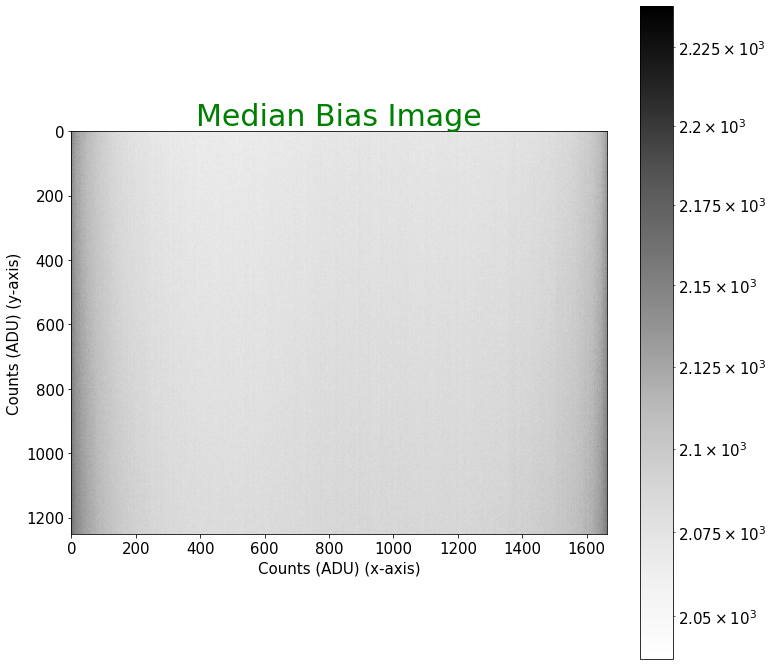

In [19]:
#The next few lines display the new image
fig, ax = plt.subplots(figsize = (12,12)) #size of the figure
plt.rcParams.update({'font.size': 15}) #size of text
plt.imshow(thisimage, cmap='Greys', norm=LogNorm()) #which image and color map
plt.xlabel('Counts (ADU) (x-axis)') #x label
plt.ylabel('Counts (ADU) (y-axis)') #y label
plt.title('Median Bias Image',size=30, color='green') #title, and its size/color of figure
plt.colorbar() #display color bar


In [22]:
#adding missing header data manually
bias_median.meta.update(EXPTIME = 0)
bias_median.meta.update(TELESCOP = biases[0].header['TELESCOP'])
bias_median.meta.update(OBJECT = 'Bias_Median')
print(bias_median.meta)

OrderedDict([('NCOMBINE', 30), ('EXPTIME', 0), ('TELESCOP', 'C11'), ('OBJECT', 'Bias_Median')])


In [23]:
#write the combined bias image into new file
bias_median.write("bias_median.fits")